In [1]:
"""
Convolution on gray scale image

1. Using cv2 load an image
2. Display the image
3. Display shape of numpy array
4. Choose a kernel to mimic gaussian blur
5. Use cv2 function to apply gaussian blur over the image
6. Display blurred image
7. Choose a random kernel of size 3x3 and name it as random_kernel
8. Apply matrix multiplication using random_kernel to try blurring the image. Do not use a cv2 function
8b. Apply the random kernel on the image

9. Write a simple error function to determine difference between gaussian kernel and random kernel
9b. Print the error between the two kernels

10. # Create a function which sets epochs to 100 and tries to determine a random_kernel as close to the original kernel
# modify the function to choose an error rate of 0.01
#  Print the error for the newly created random_kernel

10b. Apply the kernel thus obtained to the image and display the image

11. Talk about intuition of getting the right kernel
12. Back propagation in CNNs are used to find out kernel values
13. Search for gaussian blur kernel intuition in chatgpt

"""

'\nConvolution on gray scale image\n\n1. Using cv2 load an image\n2. Display the image\n3. Display shape of numpy array\n4. Choose a kernel to mimic gaussian blur\n5. Use cv2 function to apply gaussian blur over the image\n6. Display blurred image\n7. Choose a random kernel of size 3x3 and name it as random_kernel\n8. Apply matrix multiplication using random_kernel to try blurring the image. Do not use a cv2 function\n8b. Apply the random kernel on the image\n\n9. Write a simple error function to determine difference between gaussian kernel and random kernel\n9b. Print the error between the two kernels\n\n10. # Create a function which sets epochs to 100 and tries to determine a random_kernel as close to the original kernel\n# modify the function to choose an error rate of 0.01\n#  Print the error for the newly created random_kernel\n\n10b. Apply the kernel thus obtained to the image and display the image\n\n11. Talk about intuition of getting the right kernel\n12. Back propagation in C

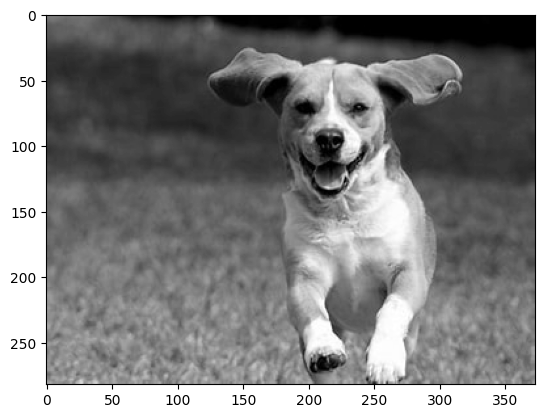

(282, 373)


In [2]:
# Write a function to use cv2 to load an image
import cv2
import numpy as np
import matplotlib.pyplot as plt

def load_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    return image

# Write a function to display the image
def display_image(image):
    plt.imshow(image, cmap='gray')
    plt.show()

# Write a function to display the shape of the numpy array
def display_shape(image):
    print(image.shape)

# load image
image = load_image(r'C:\Users\ammar\Downloads\dog1.jpeg')
display_image(image)
display_shape(image)




[[0.0625 0.125  0.0625]
 [0.125  0.25   0.125 ]
 [0.0625 0.125  0.0625]]
0.1111111111111111
0.0572653559113564


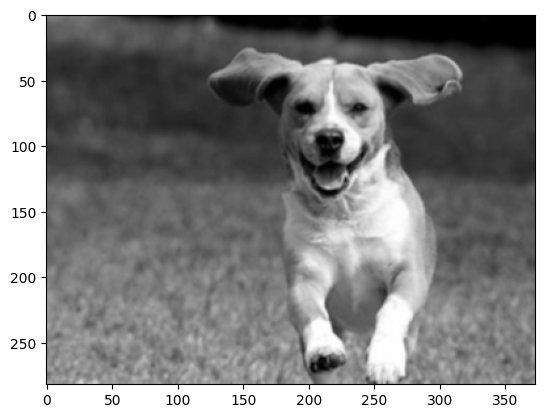

In [10]:

# Choose a kernel to mimic gaussian blur
kernel = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]])
kernel = kernel / np.sum(kernel)
print(kernel)

# print the mean and sigma of the kernel
print(np.mean(kernel))
print(np.std(kernel))

# Use cv2 function to apply gaussian blur over the image
blurred_image = cv2.filter2D(image, -1, kernel)
display_image(blurred_image)



[[-0.33194786 -0.05699871  0.20773576]
 [ 0.31827839 -0.43458297  0.68630877]
 [ 0.45655148  0.06983095  0.08482419]]
0.1111111111111111
0.3378321807456492


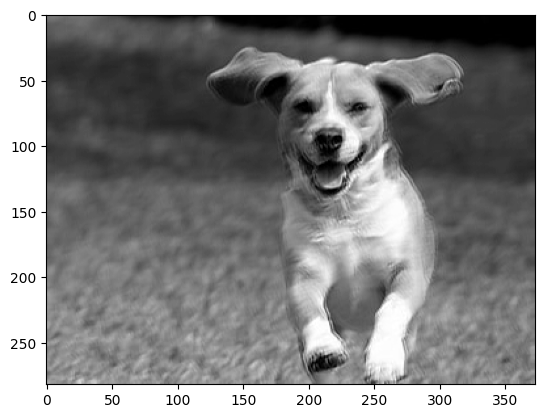

[[ 0.17373947  0.19568686 -0.0086603 ]
 [ 0.71020169 -0.26410731  0.24098204]
 [-0.40673923  0.26835196  0.09054481]]
0.11111111111111113
0.304649531732946


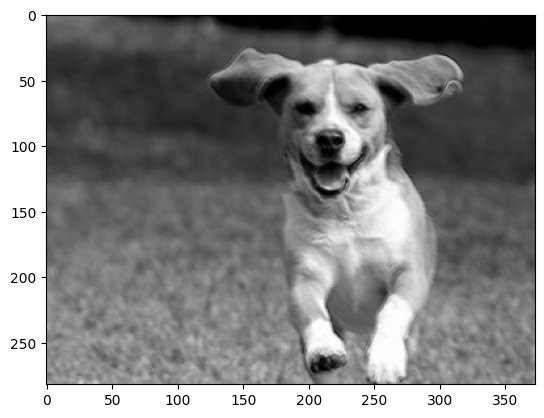

[[ -6.3269167   17.98951463  -6.012449  ]
 [ -9.86794861 -25.57256119  -6.0814416 ]
 [ 14.82724142  16.45654734   5.58801371]]
0.11111111111111122
13.783638071550598


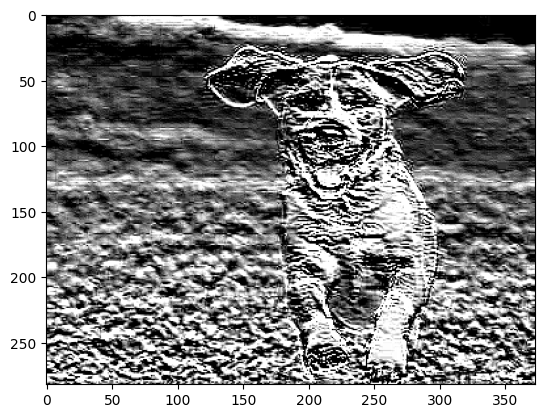

In [21]:

# compute a 3x3 kernel of mean=0 and sigma=1 
random_kernel = np.random.normal(0, 1, (3, 3))
random_kernel = random_kernel / np.sum(random_kernel)
print(random_kernel)

# print the mean and sigma of the kernel
print(np.mean(random_kernel))
print(np.std(random_kernel))

# Apply this kernel using cv2 function to blur the image
blurred_image = cv2.filter2D(image, -1, random_kernel)
display_image(blurred_image)

# compute a 3x3 kernel of mean=0 and sigma=2
random_kernel = np.random.normal(0, 2, (3, 3))
random_kernel = random_kernel / np.sum(random_kernel)
print(random_kernel)

# print the mean and sigma of the kernel
print(np.mean(random_kernel))
print(np.std(random_kernel))

# Apply this kernel using cv2 function to blur the image
blurred_image = cv2.filter2D(image, -1, random_kernel)
display_image(blurred_image)


# compute a 3x3 kernel of mean=0 and sigma=3
random_kernel = np.random.normal(0, 3, (3, 3))
random_kernel = random_kernel / np.sum(random_kernel)
print(random_kernel)

# print the mean and sigma of the kernel
print(np.mean(random_kernel))
print(np.std(random_kernel))

# Apply this kernel using cv2 function to blur the image
blurred_image = cv2.filter2D(image, -1, random_kernel)
display_image(blurred_image)








In [7]:
# Choose a random kernel of size 3x3 and name it as random_kernel
random_kernel = np.random.rand(3, 3)
random_kernel = random_kernel / np.sum(random_kernel)
print(random_kernel)


[[0.01225106 0.10564886 0.16136574]
 [0.13922608 0.16123775 0.1462165 ]
 [0.09638665 0.08340054 0.09426681]]


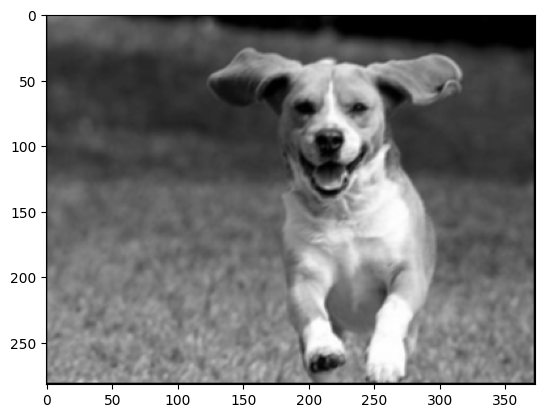

In [8]:
# Apply matrix multiplication using random_kernel to try blurring the image. Do not use a cv2 function
def apply_kernel(image, kernel):
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape
    output = np.zeros((image_height, image_width))
    for i in range(1, image_height - 1):
        for j in range(1, image_width - 1):
            output[i, j] = np.sum(image[i - 1:i + 2, j - 1:j + 2] * kernel)
    return output

# Apply the random kernel on the image
blurred_image = apply_kernel(image, random_kernel)
display_image(blurred_image)

In [9]:
#  Write a simple error function to determine difference between gaussian kernel and random kernel
def error(kernel1, kernel2):
    return np.sum(np.abs(kernel1 - kernel2))

# Print the error between the two kernels
print(error(kernel, random_kernel))

0.39992356766396975


In [14]:
# Create a function which sets epochs to 100 and tries to determine a random_kernel as close to the original kernel
# modify the function to choose an error rate of 0.01
#  Print the error for the newly created random_kernel

def create_kernel(kernel):
    epochs = 100
    learning_rate = 0.01
    random_kernel = np.random.rand(3, 3)
    random_kernel = random_kernel / np.sum(random_kernel)
    for i in range(epochs):
        random_kernel = random_kernel - learning_rate * (random_kernel - kernel)
    return random_kernel

random_kernel = create_kernel(kernel)
print(error(kernel, random_kernel))


0.16204806905644073


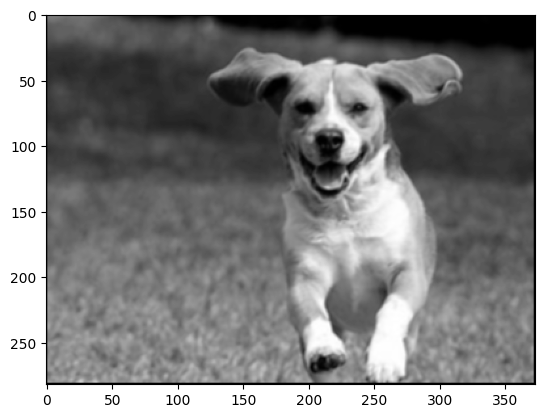

In [15]:
# Apply the kernel thus obtained to the image and display the image
blurred_image = apply_kernel(image, random_kernel)
display_image(blurred_image)
